<h1 align="center" style="color:#FF0800">
 Обробка та аналіз БМД.<br>
 Группа: БС-83<br>
 Мельничук Я.O.<br>
 Практикум Номер 6<br\></h1>

<h2 align="center"> Завдання</h2>
1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище.

2. Побудувати графік, що відображає розкид даних в групах. 

3. Написати функції:

* для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту та результат оцінки рівності дисперсій (significant або not significant).

* для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

4. Перевірити розбіжність на між групами на даних з п. 1.

In [1]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
table1=[]
table1 = [180,162,139,179,199,167,158,156,175,149]
table2=[]
table2 = [141,190,156,164,172,195,193,187,177,127]
df = pd.DataFrame({
    'ЗНО Історія': table1,
    'ЗНО Математика': table2
}, index=np.arange(1, len(table1)+1))
df.columns.name = 'Оцінки'
df.index.name = '№ школяра'
df

Оцінки,ЗНО Історія,ЗНО Математика
№ школяра,,
1,180,141
2,162,190
3,139,156
4,179,164
5,199,172
6,167,195
7,158,193
8,156,187
9,175,177


[]

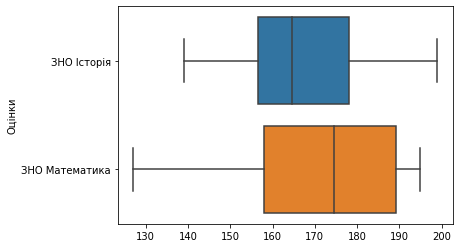

In [3]:
sns.boxplot(data=df, orient='h').set()

In [4]:
def sd(massiv,n):
    s=0
    mean=(sum(massiv))/n
    for i in range (n):
        s+=((massiv[i]-mean))**2
    return s/(n-1)
def livenia(x,y):
    n=len(x)
    m=len(y)
    k1=sd(x,n)
    k2=sd(y,m)
    if k1>k2:
        f=k1/k2
    else:
        f=k2/k1
    print('Отримане значення критерію Лівеня : F = ' + str(f))
    df1=n-1
    df2=m-1
    print('Значення ступенів свободи: df1 = ' + str(df1) + "; df2 = " + str(df2))
    table = pd.read_excel("tab1.xlsx").iloc[df1,df2]
    print("Критичне значення критерію Лівеня = " + str(table))
    if f<table:
        result = "Оскільки значення критерію Лівеня менше, ніж його критичне значення, то результат оцінки значимості зв'зку - not significant"
    else:
        result = "Оскільки значення критерію Лівеня більше, ніж його критичне значення, то результат оцінки значимості зв'зку -  significant"
    return result

In [5]:
def t_criterion(x,y,flag):
    if flag=="significant":
        n=len(x)
        m=len(y)
        k1=sd(x,n)
        k2=sd(y,m)
        m1=sum(x)/n
        m2=sum(y)/n
        df=n+m-2
        t=(abs(m1-m2))/(math.sqrt((k1/n)+(k2/m)))
    elif flag=="not significant":
        n=len(x)
        m=len(y)
        k1=sd(x,n)
        k2=sd(y,m)
        m1=sum(x)/n
        m2=sum(y)/n
        df1=n-1
        df2=m-1
        df=n+m-2
        k=(1/n)+(1/m)
        t=(abs(m1-m2))/(math.sqrt(((df1*k1+df2*k2)/df)*k))
    else:
        return "You input the wrong flag"
    print('Отримане значення критерію Стьюдента: t = ' + str(t))
    print('Значення ступеня свободи: df = ' + str(df))
    table = pd.read_excel("tab2.xlsx").iloc[df-1,1]
    print("Критичне значення критерію Стьюдента = " + str(table))
    if t<table:
        result = "Оскільки значення критерію Стьюдента менше, ніж його критичне значення, то результат оцінки значимості зв'зку - significant"
    else:
        result = "Оскільки значення критерію Стьюдента більше, ніж його критичне значення, то результат оцінки значимості зв'зку -  not significant"
    return result

In [6]:
livenia(table1,table2)

Отримане значення критерію Лівеня : F = 1.76313863270385
Значення ступенів свободи: df1 = 9; df2 = 9
Критичне значення критерію Лівеня = 3.18


"Оскільки значення критерію Лівеня менше, ніж його критичне значення, то результат оцінки значимості зв'зку - not significant"

In [7]:
t_criterion(table1,table2,"significant")

Отримане значення критерію Стьюдента: t = 0.41488847939069634
Значення ступеня свободи: df = 18
Критичне значення критерію Стьюдента = 2.101


"Оскільки значення критерію Стьюдента менше, ніж його критичне значення, то результат оцінки значимості зв'зку - significant"

Висновок:

Дисперсії статистично відмінні

Середні статистично рівні